In [ ]:
# primero voy a resolver la edo de la eq de hawking para encontrar cuales son los valores de masa que tiene
# sentido usar

In [11]:
from astropy import constants as ast
from astropy import units as u

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs           #constante de gravitacion universal en cgs
c = ast.c.cgs           #velocidad de la luz en cgs

In [16]:
from scipy import constants as sci
from scipy.constants import physical_constants

masa_planck = physical_constants["Planck mass"][0]
m_planck = masa_planck*(10**3)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6289174826599D-29   r2 =  0.2032437140680D-45
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6289174826599D-29   r2 =  0.2032437140680D-45
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6289174826599D-29   r2 =  0.2632803908625D-45
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6289174826599D-29   r2 =  0.6582009771563D-46
 lsoda--  warning..internal t (=r1) 

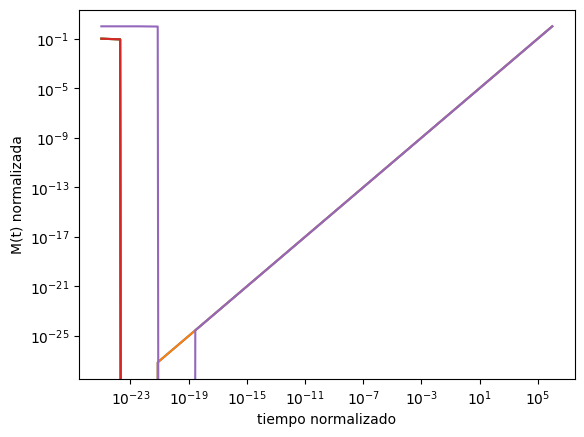

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

m_sol = ast.M_sun.cgs   # masa del sol en gramos
m_sol = m_sol.value

# defino la eq de variacion de masa por radiacion de hawking 

def model(M, t):
    A_M = 5.3e25       # en unidades de g^3 s^-1
    dMdt = - A_M / M**2        
    return dMdt

# mi condicion inicial es un rango de masas, de modo que 
masas = np.logspace(np.log10((6.5*10**14)*m_planck), np.log10(m_sol*10**6), 5)

rango = (0.1, 1) #para no dividir por cero
minimo = np.min(masas)
maximo = np.max(masas)

minimo_posta, maximo_posta = rango 

masas_norm = (masas - minimo) / (maximo - minimo) * (maximo_posta- minimo_posta) + minimo_posta

# los tiempos 
t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)

t_norm = (t - np.min(t))/ (np.max(t) - np.min(t))


resultados = []

for m_0 in masas_norm:
    M = odeint(model, m_0, t_norm, atol=1e-8, rtol=1e-6)
    resultados.append(M)

plt.figure()  # Crear una nueva figura
for M in resultados:
    plt.plot(t, M)

plt.xlabel('tiempo normalizado')
plt.ylabel('M(t) normalizada')
plt.yscale('log')
plt.xscale('log')
plt.show()


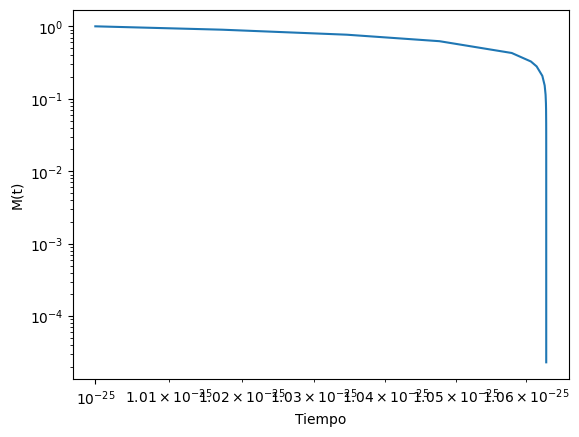

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define tu función de modelo
def model(t, M):
    A_M = 5.3e25
    dMdt = -A_M / M**2
    return dMdt


masas = np.logspace(np.log10((6.5*10**14)*m_planck), np.log10(m_sol*10**6), 5)

#normalizo los tiempos
rango = (0.1, 1) #para no dividir por cero
minimo = np.min(masas)
maximo = np.max(masas)

minimo_posta, maximo_posta = rango 

masas_norm = (masas - minimo) / (maximo - minimo) * (maximo_posta- minimo_posta) + minimo_posta

# los tiempos 
tiempo = np.logspace(np.log10(10**-25), np.log10(10**6), 25)
t_norm = (t - np.min(t))/ (np.max(t) - np.min(t))


#probando condicion inicial 
M_0 = (6.5*10**14)*m_planck

#defino metodo de integracion
method = 'RK45'

#resuelvo la EDO
sol = solve_ivp(model, (tiempo[0], tiempo[-1]), [m_0], method=method, vectorized=True)

# Extrae los resultados
tiempo = sol.t
Masa = sol.y[0]

# Plotea los resultados
plt.figure()
plt.plot(tiempo, Masa)
plt.xlabel('Tiempo')
plt.ylabel('M(t)')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
#ahora pruebo varias condiciones iniciales 

14146820999.999975


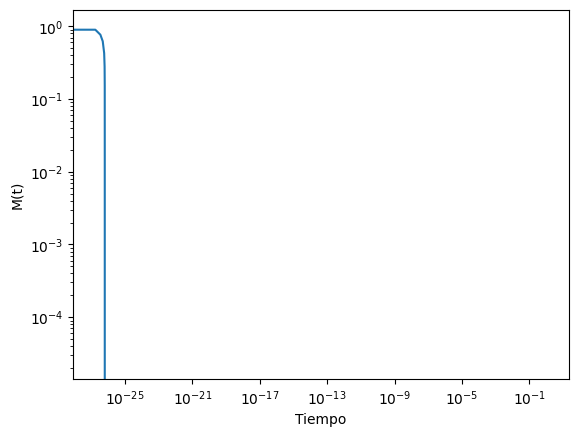

2.7391803114752e+17


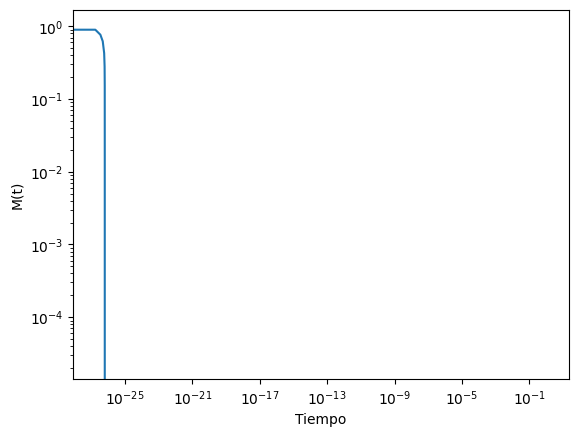

5.303741935218772e+24


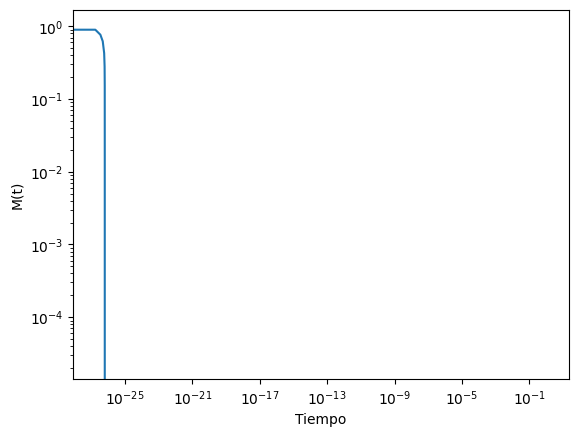

1.0269378177681558e+32


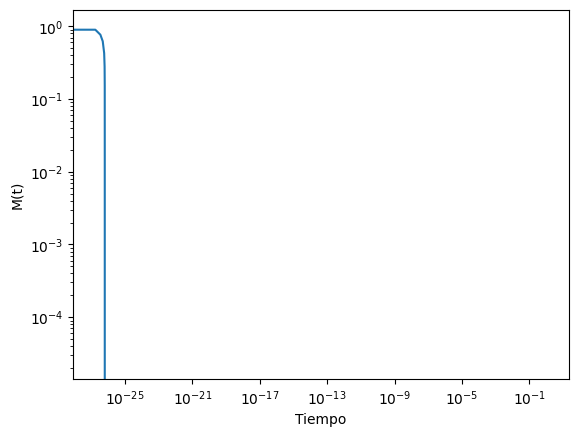

1.9884098706980572e+39


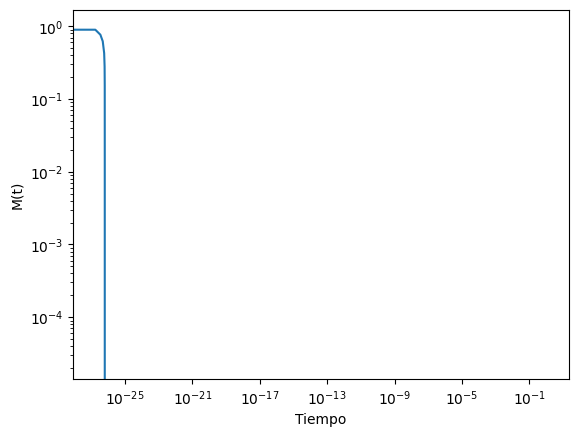

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define tu función de modelo
def model(t, M):
    A_M = 5.3e25
    dMdt = -A_M / M**2
    return dMdt


masas = np.logspace(np.log10((6.5*10**14)*m_planck), np.log10(m_sol*10**6), 5)

tiempo = np.logspace(np.log10(10**-25), np.log10(10**6), 25)


for M_0 in masas:
    
    print(M_0)
    
    method = 'RK45'
    sol = solve_ivp(model, (t_norm[0], t_norm[-1]), [m_0], method=method, vectorized=True)
    
    tiempo = sol.t
    Masa = sol.y[0]
    
    plt.figure()
    plt.plot(tiempo, Masa)
    plt.xlabel('Tiempo')
    plt.ylabel('M(t)')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()


/tmp/ipykernel_26032/115104103.py:16: RuntimeWarning: invalid value encountered in power
  M = (M_0**3 - 3*A_M*t)**(1/3)


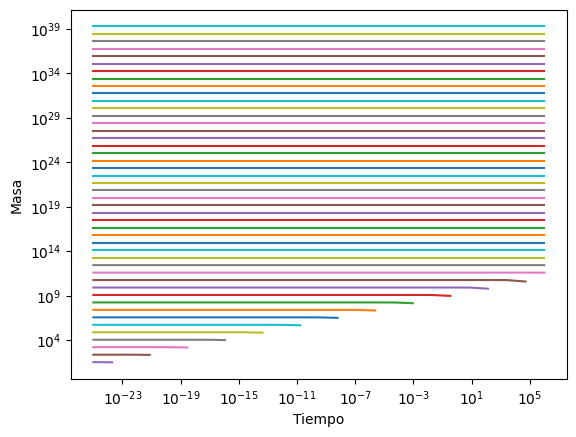

In [87]:
m_sol = ast.M_sun.cgs   # masa del sol en gramos
m_sol = m_sol.value

t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)
masas = np.logspace(np.log10((6.5*10**2)*m_planck), np.log10(m_sol*10**6), )

resultados = []

for M_0 in masas:     
    if M_0 > 10**17:
        A_M = 5.3*10**25
        M = (M_0**3 - 3*A_M*t)**(1/3)
        resultados.append(M)
    else: 
        A_M = 7.8*10**26
        M = (M_0**3 - 3*A_M*t)**(1/3)
        resultados.append(M)
              

plt.figure()  # Crear una nueva figura
for M in resultados:
    plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.xscale('log')
plt.yscale('log')
plt.show()   
        


/tmp/ipykernel_26032/1816516586.py:17: RuntimeWarning: invalid value encountered in power
  M = (M_0**3 - 3*A_M*t)**(1/3)


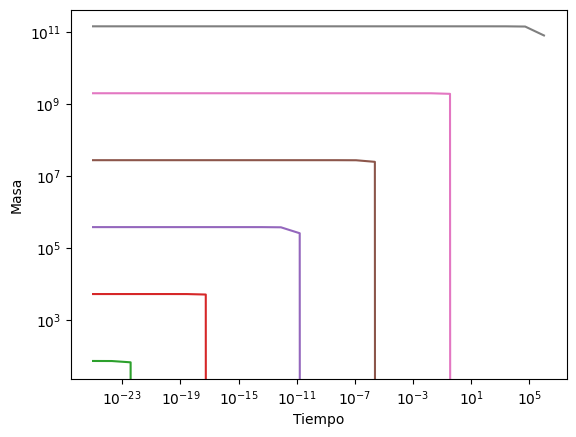

In [80]:
m_sol = ast.M_sun.cgs   # masa del sol en gramos
m_sol = m_sol.value

masas = np.logspace(np.log10((6.5*10**2)*m_planck), np.log10((6.5*10**15)*m_planck), 8)

t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)

resultados = []

for M_0 in masas:     
    if M_0 > 10**17:
        A_M = 5.3*10**25
        M = (M_0**3 - 3*A_M*t)**(1/3)
        M_pos = [x if x > 0 else 0 for x in M]
    else: 
        A_M = 7.8*10**26
        M = (M_0**3 - 3*A_M*t)**(1/3)
        M_pos = [x if x > 0 else 0 for x in M]
        
    resultados.append(M_pos)
    

plt.figure()  # Crear una nueva figura
for M in resultados:
    plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.xscale('log')
plt.yscale('log')
plt.show()
              



In [89]:
m_sol = ast.M_sun.cgs   # masa del sol en gramos
m_sol = m_sol.value

masas = np.logspace(np.log10((6.5*10**2)*m_planck), np.log10((6.5*10**15)*m_planck), 8)

t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)

resultados = []
radicando = []

for M_0 in masas:     
    if M_0 > 10**17:
        A_M = 5.3*10**25
        M = (M_0**3 - 3*A_M*t)**(1/3)
        rad = M_0**3 - 3*A_M*t
        radicando.append(rad)
       
    else: 
        A_M = 7.8*10**26
        M = (M_0**3 - 3*A_M*t)**(1/3)
        rad = M_0**3 - 3*A_M*t
        radicando.append(rad)
        
    resultados.append(M)
    
    print(M_0)
    print(radicando)
    

             

0.014146820999999997
[array([-2.33999997e+02, -4.58017977e+03, -8.96497723e+04, -1.75475245e+06,
       -3.43465029e+07, -6.72278451e+08, -1.31587870e+10, -2.57562436e+11,
       -5.04137717e+12, -9.86769818e+13, -1.93144579e+15, -3.78049955e+16,
       -7.39972972e+17, -1.44838002e+19, -2.83497472e+20, -5.54901447e+21,
       -1.08613179e+23, -2.12593113e+24, -4.16117382e+25, -8.14483938e+26,
       -1.59422344e+28, -3.12044015e+29, -6.10776788e+30, -1.19549893e+32,
       -2.34000000e+33])]
1.018126439221183
[array([-2.33999997e+02, -4.58017977e+03, -8.96497723e+04, -1.75475245e+06,
       -3.43465029e+07, -6.72278451e+08, -1.31587870e+10, -2.57562436e+11,
       -5.04137717e+12, -9.86769818e+13, -1.93144579e+15, -3.78049955e+16,
       -7.39972972e+17, -1.44838002e+19, -2.83497472e+20, -5.54901447e+21,
       -1.08613179e+23, -2.12593113e+24, -4.16117382e+25, -8.14483938e+26,
       -1.59422344e+28, -3.12044015e+29, -6.10776788e+30, -1.19549893e+32,
       -2.34000000e+33]), array([

/tmp/ipykernel_26032/3608589562.py:20: RuntimeWarning: invalid value encountered in power
  M = (M_0**3 - 3*A_M*t)**(1/3)


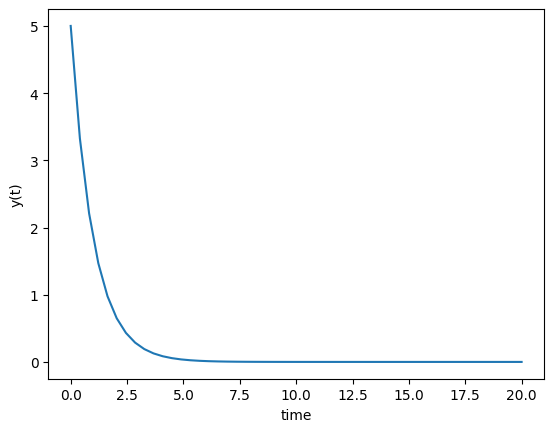

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#la ecuacion de esta gente es dy/dt = -k y(t)

# function that returns dy/dt
def model(y,t):
    k = 1
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

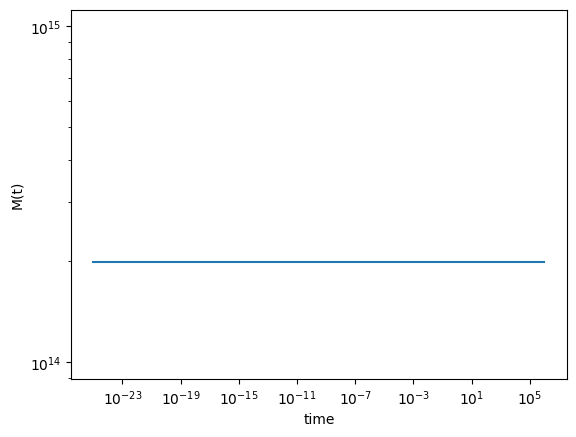

In [14]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m_sol = ast.M_sun.cgs   # masa del sol en gramos
m_sol = m_sol.value

#creo el modelo gekko
model = GEKKO()

#agrego las constantes y las variables
A_M = 5.3*10**25        # en unidades de g^3 s^-1
masas = np.logspace(np.log10(10**(-19)*m_sol), np.log10(m_sol*10**6), 5) #pongo las masas pero no las uso todavia
M_0 = 10**(-19)*m_sol
M = model.Var(M_0)    
    
#la ecuacion a resolver es
model.Equation(M.dt() == - A_M / M**2)
   
#el tiempo sera 
model.time = np.logspace(np.log10(10**-25), np.log10(10**6), 25)

#resolvemos la EDO 
model.options.IMODE = 4
model.solve(disp=False)

#ploteamos
plt.plot(model.time,M)
plt.xlabel('time')
plt.ylabel('M(t)')
plt.xscale('log')
plt.yscale('log')
plt.show()
   


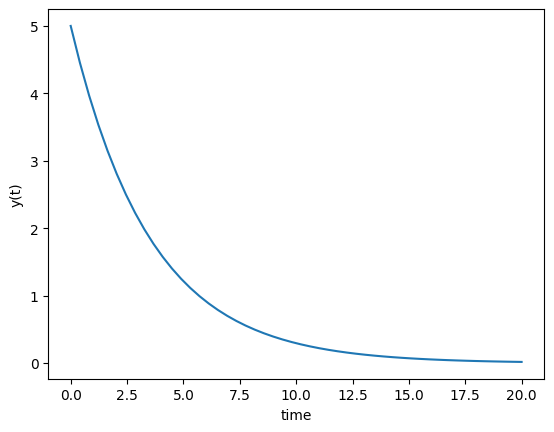

In [9]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()    # create GEKKO model
k = 0.3        # constant
y = m.Var(5.0) # create GEKKO variable
m.Equation(y.dt()==-k*y) # create GEKKO equation
m.time = np.linspace(0,20) # time points

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [8]:
!pip install gekko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:01:01


In [7]:
!pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
